In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
company = ['Allied Signal','Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.',
           'Lehman Brothers','Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems',
            'Travelers','US Airways','Warner-Lambert',]

In [3]:
measure_X = [24.23, 25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00]

Plotting Graphs to find how the data are distributed among these companies.

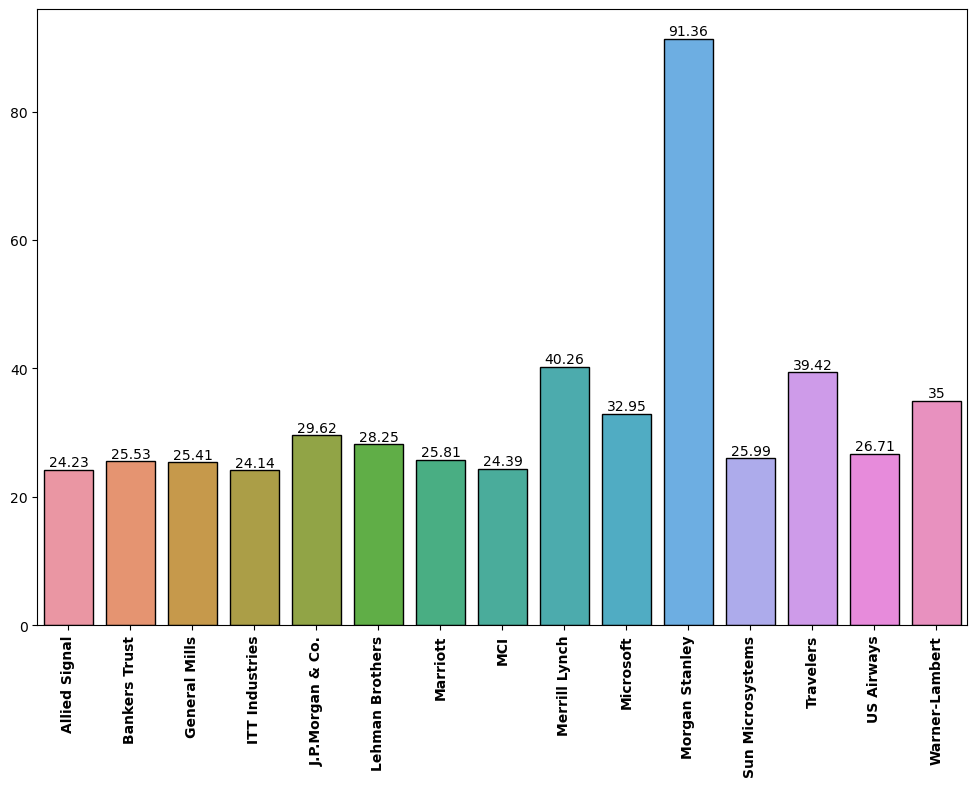

In [4]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=company, y=measure_X, edgecolor='black')
plt.xticks(rotation=90, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

(array([10.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([24.14 , 30.862, 37.584, 44.306, 51.028, 57.75 , 64.472, 71.194,
        77.916, 84.638, 91.36 ]),
 <BarContainer object of 10 artists>)

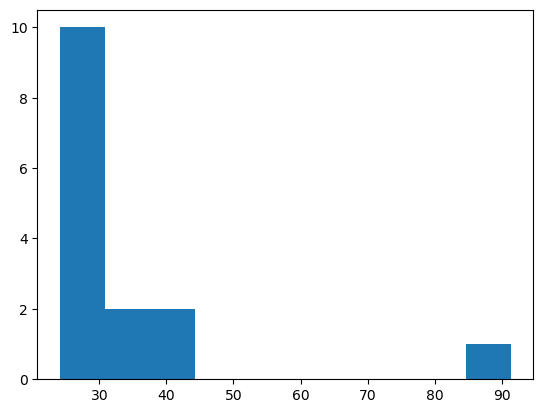

In [8]:
plt.hist(measure_X)

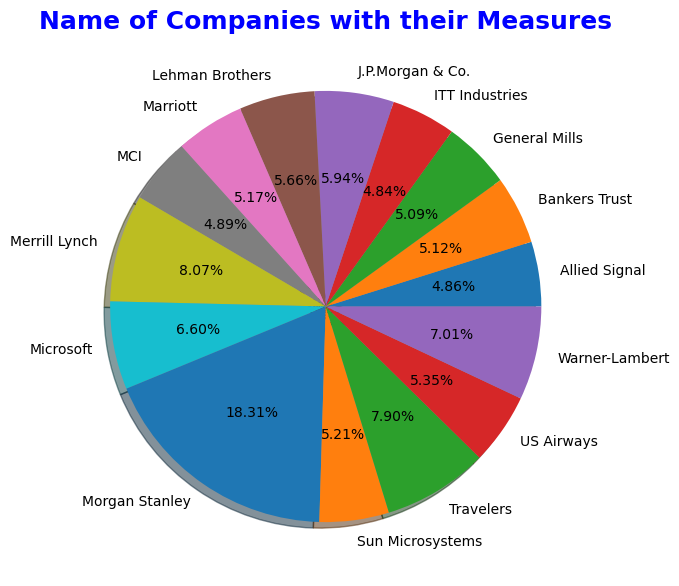

In [7]:
plt.figure(figsize=(10,7))
plt.pie(measure_X, labels=company, autopct= '%.2f%%',shadow = True)
plt.title('Name of Companies with their Measures', fontsize = 18, fontweight = 'bold', color='b')

plt.show()


Finding outliers

<AxesSubplot:>

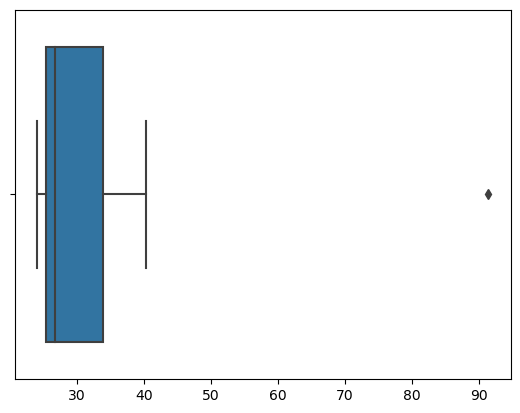

In [10]:
sns.boxplot(measure_X)

Here we can see, there is one Outlier in the Data and its Morgan Stanley

In [40]:
measure_X = pd.Series(measure_X)

In [45]:
x_data = pd.DataFrame(measure_X, columns=["measure_X"])
x_data

,measure_X
0,24.23
1,25.53
2,25.41
3,24.14
4,29.62
5,28.25
6,25.81
7,24.39
8,40.26
9,32.95


In [46]:
x_data.describe()

,measure_X
count,15.000000
mean,33.271333
std,16.945401
min,24.140000
25%,25.470000
50%,26.710000
75%,33.975000
max,91.360000


In [48]:
print("Variance of the Data: ", measure_X.var())

Variance of the Data:  287.1466123809524


In [43]:
Q1 = np.quantile(measure_X,0.25)
Q2 = np.quantile(measure_X, 0.50)
Q3 = np.quantile(measure_X, 0.75)
IQR = Q3-Q1
print("First Quantile: ",Q1)
print("Second Quantile: ",Q2)
print("Third Quantile: ",Q3)
print("Inter Quartile Range: %.3f" %IQR)

First Quantile:  25.47
Second Quantile:  26.71
Third Quantile:  33.975
Inter Quartile Range: 8.505


In [31]:
upper_bound = Q3+ (1.5*IQR)
lower_bound = Q1- (1.5*IQR)
print("Upper Bound: ", upper_bound)
print("Lower Bound: %.3f" %lower_bound)

Upper Bound:  46.7325
Lower Bound: 12.712


finding outliers

In [32]:
measure_X = [24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00]

outliers = []
def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z = (i-mean)/std
        if np.abs(z) > threshold:
            outliers.append(i)
    return outliers

print("Outliers in the data: ", detect_outlier(measure_X))

Outliers in the data:  [91.36]
